In [30]:
from scipy import misc
import glob
from skimage import io
from skimage.transform import resize
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
images = []

for image_path in glob.glob("dane/set0/*.png"):
    image = io.imread(image_path, as_gray=True)
    images.append(image)

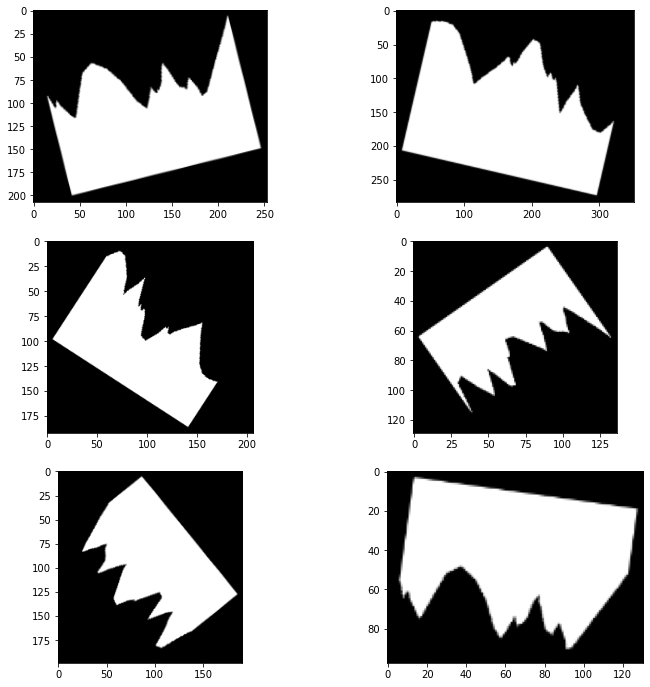

In [39]:
fig, axs = plt.subplots(3,2, figsize=(12,12))

for index, image in enumerate(images):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 


In [33]:
numpyImages = []
for image in images:
    numpyImages.append(np.array(image))

In [42]:
def centerOfMass(image):
    SumX = 0
    SumY = 0
    num  = 0
    
    imageWidth, imageHeight = image.shape
    
    for i in range(imageWidth):
        for j in range(imageHeight):
            SumX += i * image[i,j]
            SumY += j * image[i,j]
            num += image[i,j]


    SumX = SumX / num;
    SumY = SumY / num;
    # The coordinate (SumX,SumY) is the center of the image mass
    return (SumX,SumY)


In [43]:
centers = []
for image in numpyImages:
    centers.append(centerOfMass(image))

In [44]:
centers

[(123.86069598942782, 130.59036186977966),
 (159.396004456174, 157.02817500224845),
 (103.15530401641136, 88.2564626384851),
 (54.0182118464279, 61.58315877889473),
 (92.87819107886075, 103.5646342910188),
 (40.81557139947509, 66.1983707210247)]

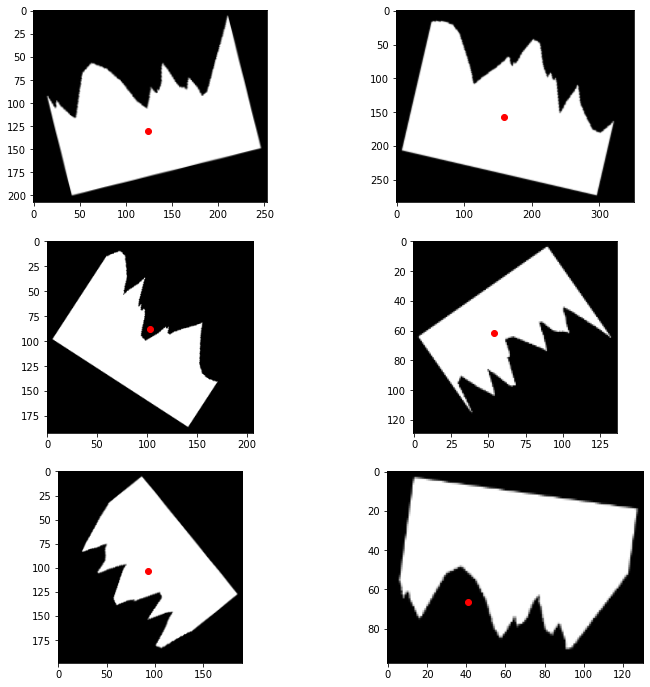

In [45]:
fig, axs = plt.subplots(3,2, figsize=(12,12))

index = 0

for image, center in zip(numpyImages, centers):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 
    axs[math.floor(index / 2),index % 2].scatter(center[0],center[1],color='r')
    index += 1